<a href="https://colab.research.google.com/github/dibyajeet125/Skin-Cancer/blob/main/Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data of images
dataset_images_L = pd.read_csv("hmnist_28_28_L.csv")
print(dataset_images_L.head())
print("Shape of images: ", dataset_images_L.shape)

# Import the data of RGB images
dataset_images_RGB = pd.read_csv("hmnist_28_28_RGB.csv")
print(dataset_images_RGB.head())
print("Shape of RGB images: ", dataset_images_RGB.shape)

# Import the metadata
dataset_meta = pd.read_csv("HAM10000_metadata.csv")
print(dataset_meta.head())
print("Shape of metadata: ", dataset_meta.shape)

   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        169        171        170        177        181        182   
1         19         57        105        140        149        148   
2        155        163        161        167        167        172   
3         25         71        116        139        136        153   
4        129        162        181        196        205        208   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0        181        185        194        192  ...      184.0      186.0   
1        144        155        170        170  ...      172.0      175.0   
2        155        152        165        175  ...      163.0      178.0   
3        148        161        172        162  ...      125.0      135.0   
4        205        213        225        224  ...      210.0      197.0   

   pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0      185.0      180.0      157.0      140.0

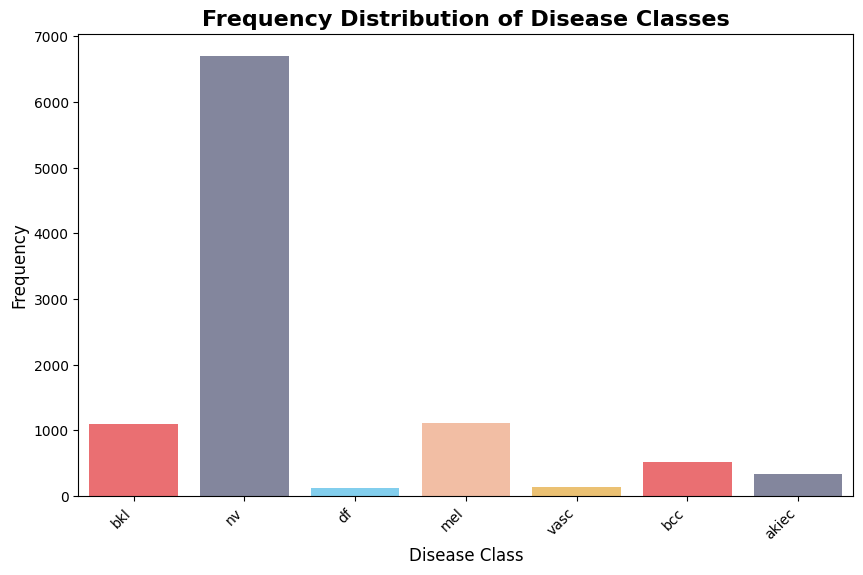

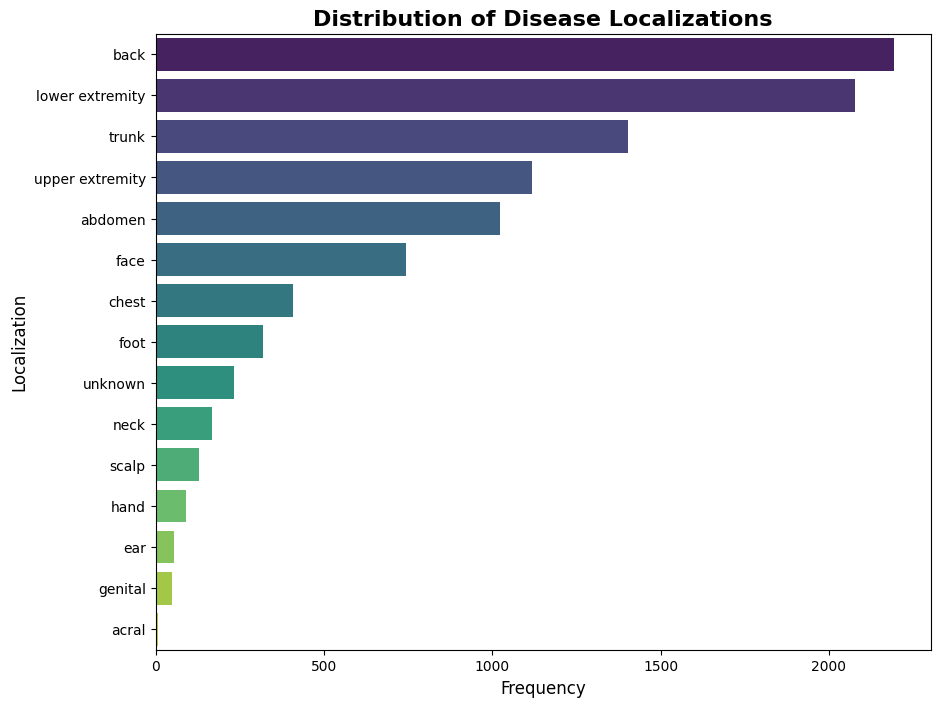

In [4]:
# Set a custom color palette
custom_palette = ['#FF5A5F', '#7F83A1', '#70D6FF', '#FFB997', '#FFC75F']

# Plotting the disease class frequencies with a custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='dx', data=dataset_meta, palette=custom_palette)
plt.xlabel('Disease Class', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Disease Classes', size=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting the distribution of disease localizations with horizontal bars
disease_location = dataset_meta['localization'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(y=disease_location.index, x=disease_location.values, palette='viridis')
plt.xlabel('Frequency', size=12)
plt.ylabel('Localization', size=12)
plt.title('Distribution of Disease Localizations', size=16, fontweight='bold')
plt.show()

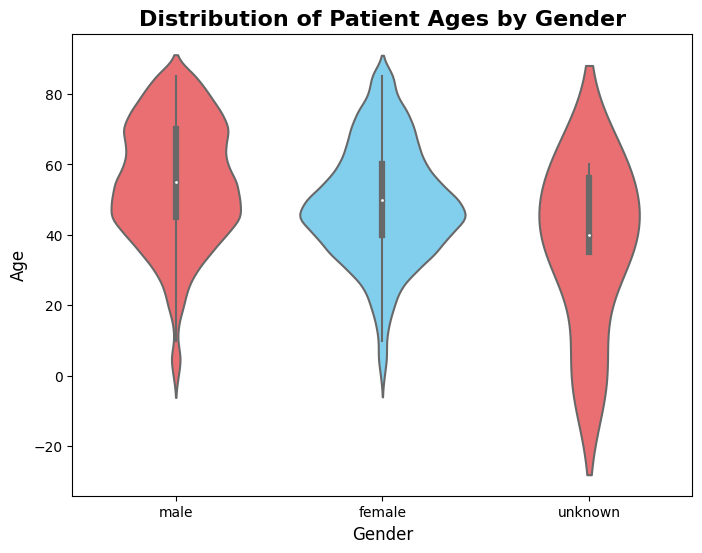

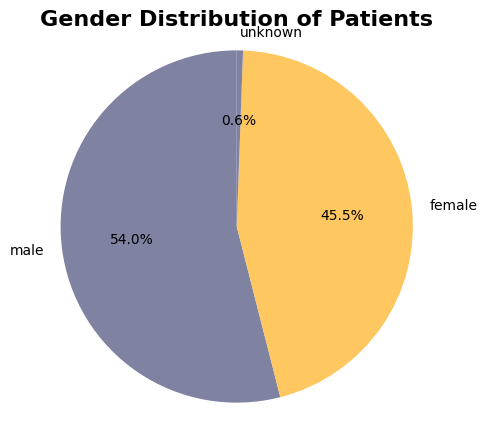

In [5]:
# Plotting a violin plot of patient ages by gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='age', data=dataset_meta, palette=['#FF5A5F', '#70D6FF'])
plt.xlabel('Gender', size=12)
plt.ylabel('Age', size=12)
plt.title('Distribution of Patient Ages by Gender', size=16, fontweight='bold')
plt.show()

# Plotting a pie chart of the gender distribution with exploded slices
explode = (0.1, 0)
plt.figure(figsize=(5, 5))
plt.pie(dataset_meta['sex'].value_counts(), labels=dataset_meta['sex'].value_counts().index,
        autopct="%.1f%%", explode=None, startangle=90, colors=['#7F83A1', '#FFC75F'])
plt.title('Gender Distribution of Patients', size=16, fontweight='bold')
plt.axis('equal')
plt.show()

In [6]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import sklearn.metrics as metrics
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Defining the number of classes
num_classes = 7

# Defining the batch size and epochs for the model
batch_size = 128
epochs = 10

# Defining the number of rows and columns representing the pixels
img_rows = 28
img_cols = 28

In [7]:
# Function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('Actual Labels', fontsize=12)
    plt.show()

# Function to plot the incorrect prediction fraction of each class label
def plot_label_errors(label_frac_error):
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(7), label_frac_error)
    plt.title('Incorrect Prediction Fraction of Labels', fontsize=16)
    plt.xlabel('True Label', fontsize=12)
    plt.ylabel('Fraction Classified Incorrectly', fontsize=12)
    plt.show()

In [8]:
# Function to build and train the model
def build_and_train_model(images, labels, model_name):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=1, test_size=0.20)

    # Encoding labels to one-hot vectors
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)

    start = time.time()

    # Model building
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, images.shape[3])))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    # Model compilation
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

    # Fitting the model
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

    stop = time.time()

    # Evaluating the model
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

    print("Time to build and train the model is: %.2f minutes" % ((stop - start) / 60))

    # Generating predictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculating confusion matrix and incorrect prediction fraction
    confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred_classes)
    label_frac_error = 1 - np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    # Plotting the confusion matrix and incorrect prediction fraction
    plot_confusion_matrix(confusion_matrix, 'Confusion Matrix for ' + model_name)
    plot_label_errors(label_frac_error)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

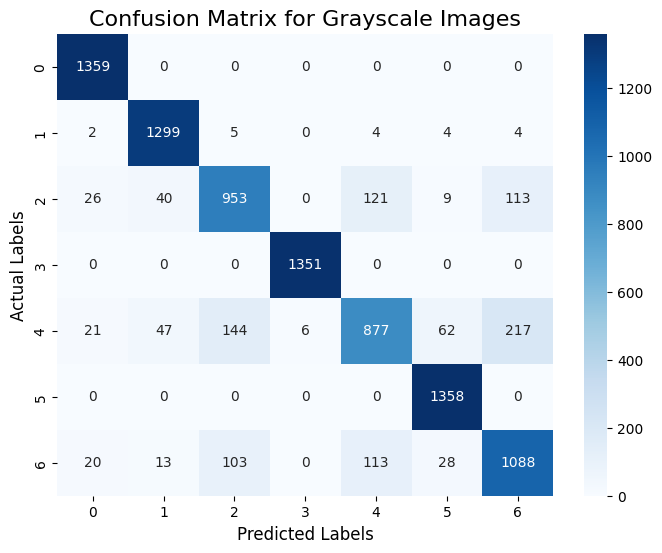

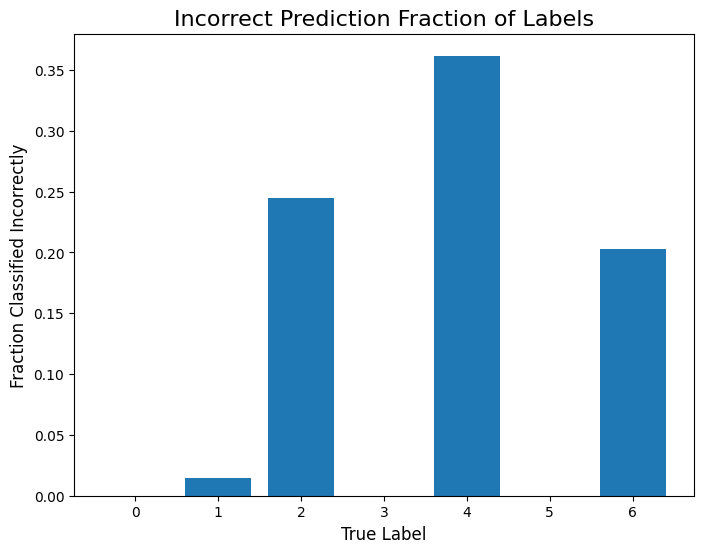

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

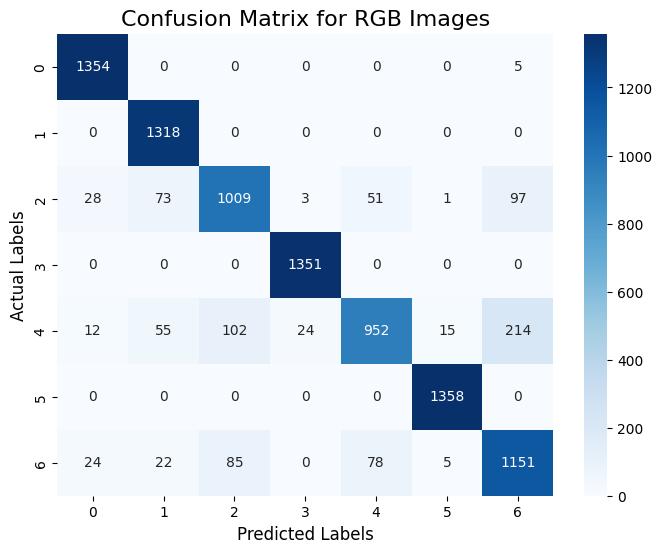

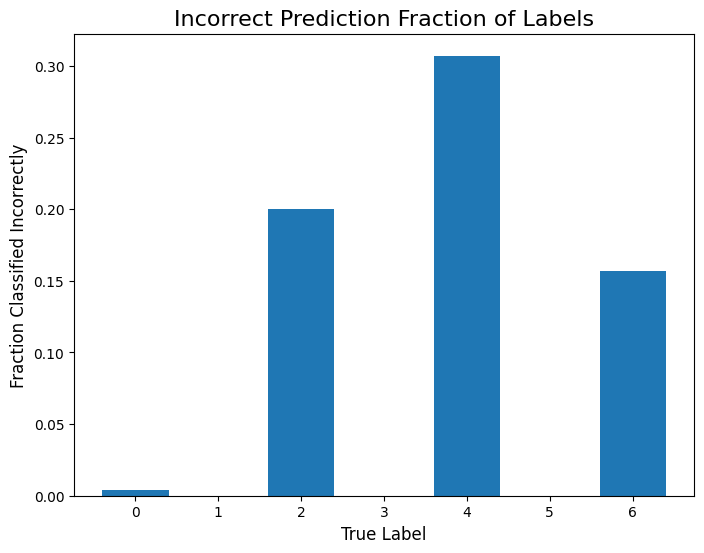

In [9]:
# Importing the dataset for grayscale images
dataset_images_L = pd.read_csv("hmnist_28_28_L.csv")

# Removing the 'label' column from the data frame to keep only the image data
images_L = dataset_images_L.drop(['label'], axis=1)

# Keeping only the label column
labels_L = dataset_images_L['label']

# Oversampling to overcome class imbalance
oversample = RandomOverSampler()
images_L, labels_L = oversample.fit_resample(images_L, labels_L)

# Reshaping and normalizing the images
images_L = np.array(images_L).reshape(-1, 28, 28, 1)
images_L = (images_L - np.mean(images_L)) / np.std(images_L)

# Building and training the model for grayscale images
build_and_train_model(images_L, labels_L, 'Grayscale Images')

# Importing the dataset for RGB images
dataset_images_RGB = pd.read_csv("hmnist_28_28_RGB.csv")

# Removing the 'label' column from the data frame to keep only the image data
images_RGB = dataset_images_RGB.drop(['label'], axis=1)

# Keeping only the label column
labels_RGB = dataset_images_RGB['label']

# Oversampling to overcome class imbalance
images_RGB, labels_RGB = oversample.fit_resample(images_RGB, labels_RGB)

# Reshaping and normalizing the images
images_RGB = np.array(images_RGB).reshape(-1, 28, 28, 3)
images_RGB = (images_RGB - np.mean(images_RGB)) / np.std(images_RGB)

# Building and training the model for RGB images
build_and_train_model(images_RGB, labels_RGB, 'RGB Images')

In [10]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import np_utils
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Hyperparameters
batch_size = 128
nb_epoch = 10

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28
num_classes = 7

# Parameters for LSTM network
nb_lstm = 64
nb_time_steps = img_rows
dim_input_vector = img_cols

In [11]:
# Function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('Actual Labels', fontsize=12)
    plt.show()

# Function to plot the incorrect prediction fraction of each class label
def plot_label_errors(label_frac_error):
    plt.figure(figsize=(8, 6))
    plt.bar(np.arange(7), label_frac_error)
    plt.title('Incorrect Prediction Fraction of Labels', fontsize=16)
    plt.xlabel('True Label', fontsize=12)
    plt.ylabel('Fraction Classified Incorrectly', fontsize=12)
    plt.show()

In [18]:
# Function to build and train the LSTM model
def build_and_train_lstm_model(images, labels, model_name):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=1, test_size=0.20)

    # Encoding labels to one-hot vectors
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)

    start = time.time()

    # Build LSTM network
    model = Sequential()
    model.add(LSTM(nb_lstm, input_shape=(nb_time_steps, dim_input_vector), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(nb_lstm, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    callback = tf.keras.callbacks.ModelCheckpoint(filepath='trained-models/lstm-best-model-' + model_name + '.h5', monitor='val_acc', mode='max', verbose=1)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fitting the model
    history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, callbacks=[callback], validation_split=0.2)

    stop = time.time()

    # Evaluating the model
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

    print("Time to build and train the model is: %.2f minutes" % ((stop - start) / 60))

    # Generating predictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculating confusion matrix and incorrect prediction fraction
    confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred_classes)
    label_frac_error = 1 - np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    # Plotting the confusion matrix and incorrect prediction fraction
    plot_confusion_matrix(confusion_matrix, 'Confusion Matrix for ' + model_name)
    plot_label_errors(label_frac_error)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 28, 64)            23808     
                                                                 
 dropout_10 (Dropout)        (None, 28, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 57,287
Trainable params: 57,287
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================

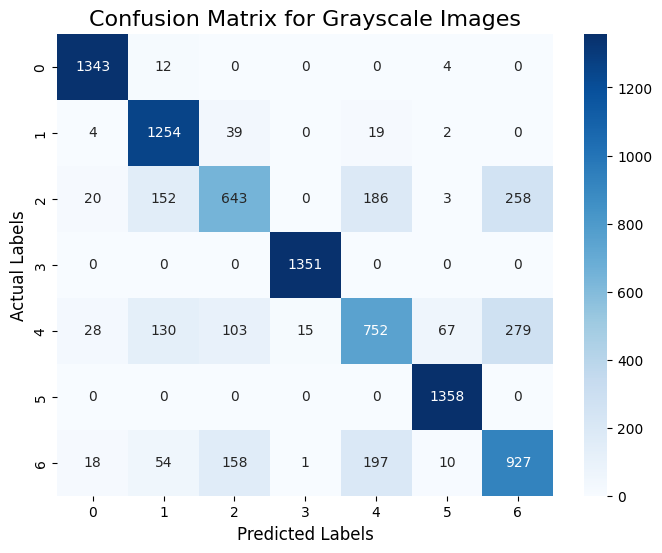

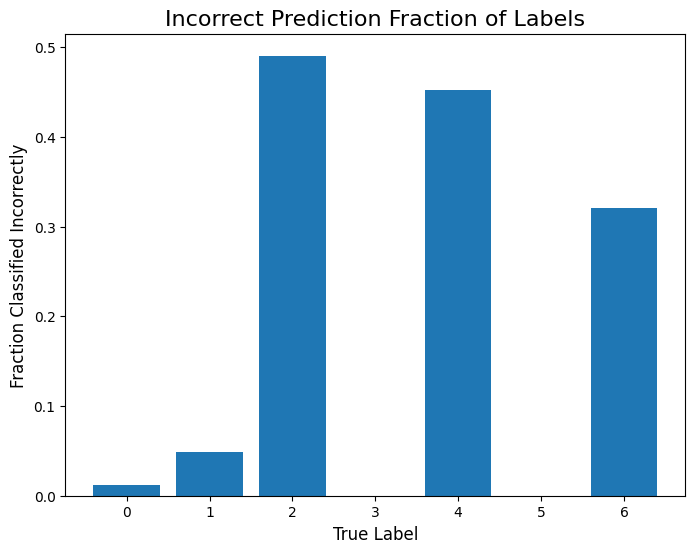

In [19]:
# Importing the dataset for grayscale images
dataset_images_L = pd.read_csv("hmnist_28_28_L.csv")

# Removing the 'label' column from the data frame to keep only the image data
images_L = dataset_images_L.drop(['label'], axis=1)

# Keeping only the label column
labels_L = dataset_images_L['label']

# Oversampling to overcome class imbalance
oversample = RandomOverSampler()
images_L, labels_L = oversample.fit_resample(images_L, labels_L)

# Reshaping the images
images_L = np.array(images_L).reshape(-1, 28, 28)

# Normalizing the images
images_L = (images_L - np.mean(images_L)) / np.std(images_L)

# Building and training the LSTM model for grayscale images
build_and_train_lstm_model(images_L, labels_L, 'Grayscale Images')

In [22]:
# Function to build and train the LSTM model
def build_and_train_lstm_model(images, labels, model_name):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=1, test_size=0.20)

    # Encoding labels to one-hot vectors
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)

    start = time.time()

    # Build LSTM network
    model = Sequential()
    model.add(LSTM(nb_lstm, input_shape=(nb_time_steps, 84), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(nb_lstm, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    callback = tf.keras.callbacks.ModelCheckpoint(filepath='trained-models/lstm-best-model-' + model_name + '.h5', monitor='val_acc', mode='max', verbose=1)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fitting the model
    history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, callbacks=[callback], validation_split=0.2)

    stop = time.time()

    # Evaluating the model
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

    print("Time to build and train the model is: %.2f minutes" % ((stop - start) / 60))

    # Generating predictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculating confusion matrix and incorrect prediction fraction
    confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred_classes)
    label_frac_error = 1 - np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

    # Plotting the confusion matrix and incorrect prediction fraction
    plot_confusion_matrix(confusion_matrix, 'Confusion Matrix for ' + model_name)
    plot_label_errors(label_frac_error)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 28, 64)            38144     
                                                                 
 dropout_14 (Dropout)        (None, 28, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 7)                 455       
                                                                 
Total params: 71,623
Trainable params: 71,623
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================

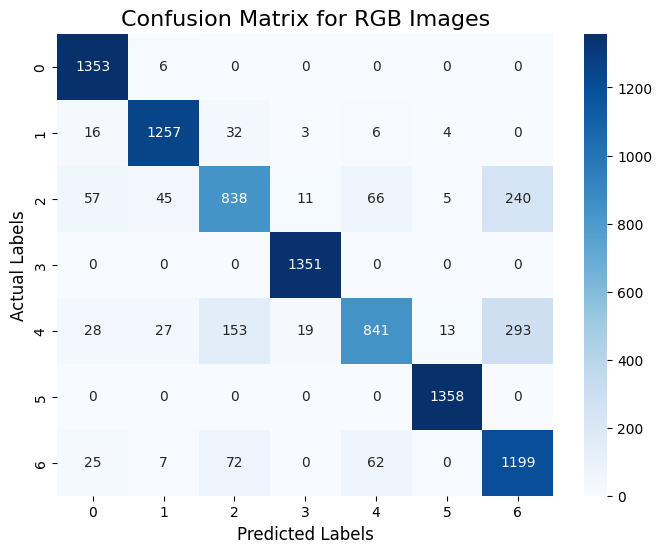

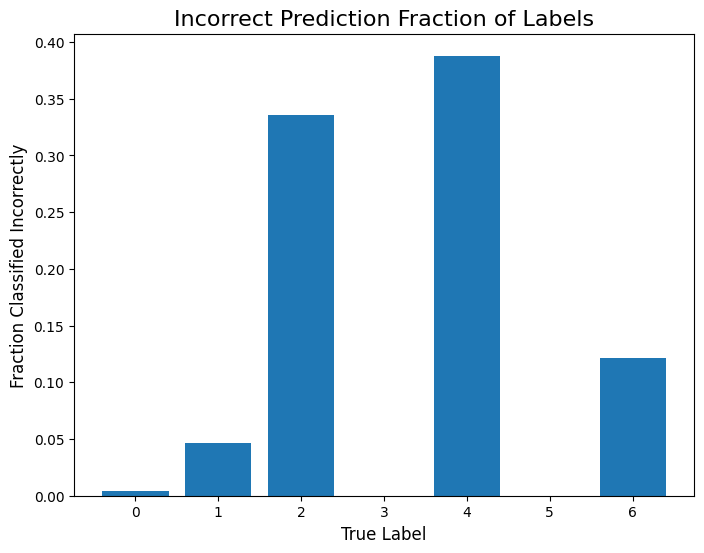

In [23]:
# Importing the dataset for RGB images
dataset_images_RGB = pd.read_csv("hmnist_28_28_RGB.csv")

# Removing the 'label' column from the data frame to keep only the image data
images_RGB = dataset_images_RGB.drop(['label'], axis=1)

# Keeping only the label column
labels_RGB = dataset_images_RGB['label']

# Oversampling to overcome class imbalance
images_RGB, labels_RGB = oversample.fit_resample(images_RGB, labels_RGB)

# Reshaping the images
images_RGB = np.array(images_RGB).reshape(-1, 28, 84)

# Normalizing the images
images_RGB = (images_RGB - np.mean(images_RGB)) / np.std(images_RGB)

# Building and training the LSTM model for RGB images
build_and_train_lstm_model(images_RGB, labels_RGB, 'RGB Images')